In [1]:
!date
!pwd

Втр Май 23 18:37:02 MSK 2017
/home/sphere/github/Sphere/separate


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

In [3]:
datum = pd.read_csv('01Events.dat', index_col=0)
print(datum.shape)
datum[:5]

(575, 25)


,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,delay,H,UTC,...,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EID,,,,,,,,,,,,,,,,,,,,,
10675,E,10,688,242,241,242,241,360,307.8,2013-03-09 18:16:20,...,3.562,9.965,31.0,0.204204,0.766965,1.802776,34.0,32.0,2.497441,2.845292
10677,E,29,1336,241,240,243,240,112,307.8,2013-03-09 18:18:12,...,53.317,501.569,51.0,0.486947,1.157275,1.519109,56.0,13.0,5.654537,27.097272
10679,D,76,7143,242,250,252,242,13,307.6,2013-03-09 18:18:25,...,600.431,2820.565,9.0,1.193805,2.939874,1.058301,14.0,25.0,0.201590,1.311606
10683,E,22,505,236,243,472,236,181,305.9,2013-03-09 18:32:54,...,30.208,663.708,2.0,1.146681,1.483240,1.927248,5.0,7.0,0.928107,18.222066
10685,E,15,6588,242,242,242,242,1160,308.1,2013-03-09 18:52:14,...,33.247,1022.189,81.0,0.329867,0.681385,1.568929,84.0,39.0,4.959357,47.367534


In [4]:
print(datum.columns)

Index(['Type', 'Dt', 'Atotal', 'TG5time', 'TL2time', 'TL3time', 'TRIGGER',
       'delay', 'H', 'UTC', 'EAS', 'SNRatio_s', 'SNRatio_n', 'AbsSignal_s',
       'AbsSignal_n', 'TotalNoise_s', 'TotalNoise_n', 'NNear3', 'Theta',
       'dt2_s', 'dt2_n', 'ng_s', 'ng_n', 'Crit1', 'Crit2'],
      dtype='object')


In [5]:
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s',       
       'TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n', 'Crit1', 'Crit2',
       'Dt', 'Atotal','delay'] 
len(param)

17

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
features = len(param)
exdata=datum[param]
events_scaled = StandardScaler().fit_transform(exdata)

### Построим 2D дендрограмму

Построим для событий дендрограмму. 

Выделим 2 главные компоненты в масштабированных данных (используйте опять  параметр `svd_solver='randomized'` и `random_state=1`), затем из всех 2-мерных точек найдите наиболее удаленную от остальных (по среднему евклидову расстоянию до других точек).

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2, svd_solver='randomized', random_state=1)
pca.fit(events_scaled)

centers = pca.transform(events_scaled)

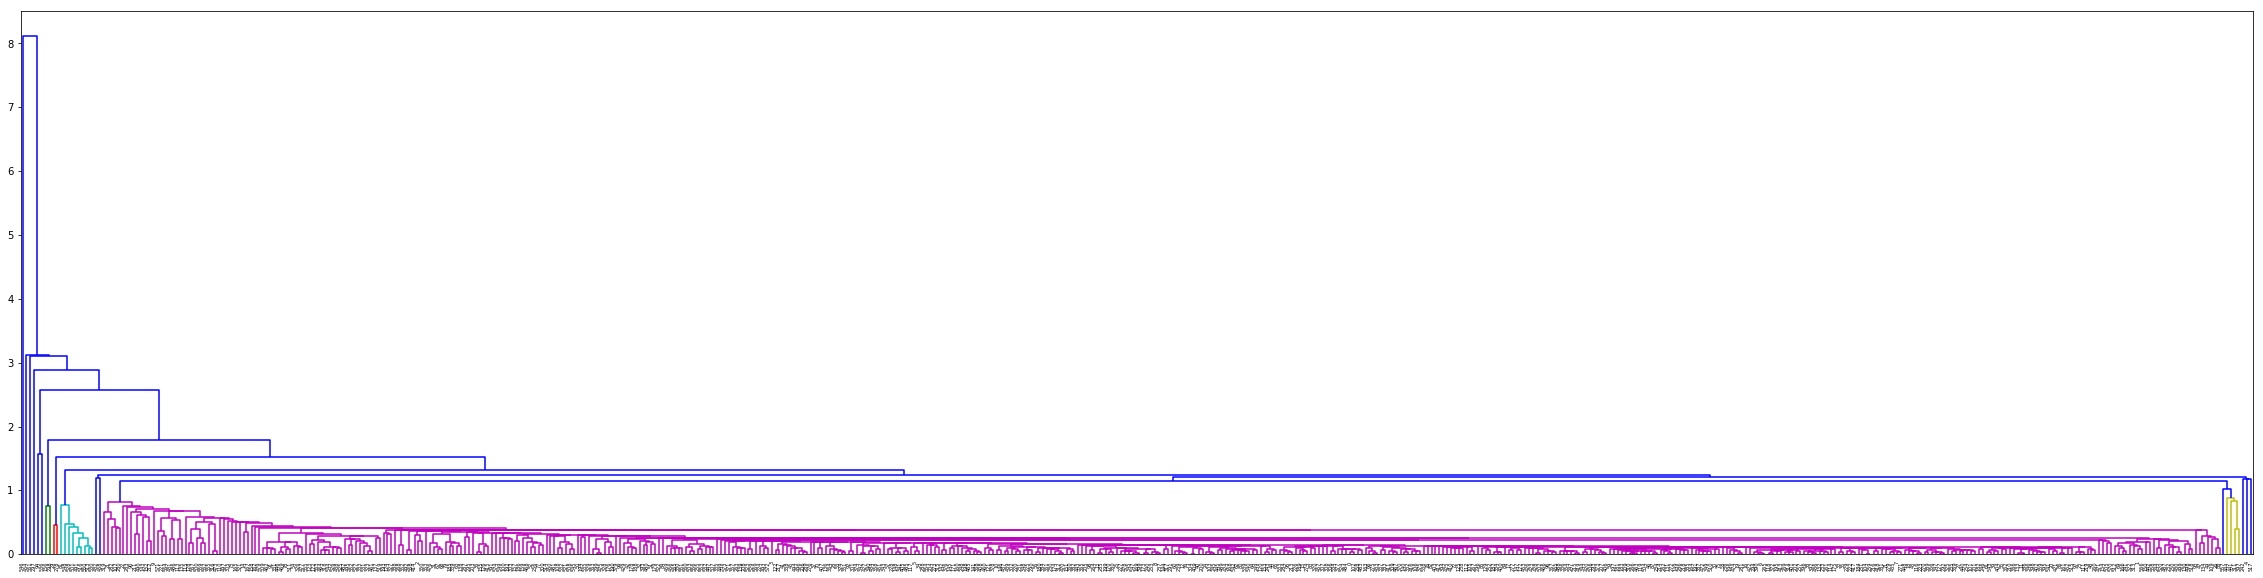

In [20]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(centers) 

plt.figure(figsize=(40, 10))
Z  = hierarchy.linkage(distance_mat, 'single') 
dn = hierarchy.dendrogram(Z, color_threshold=1)

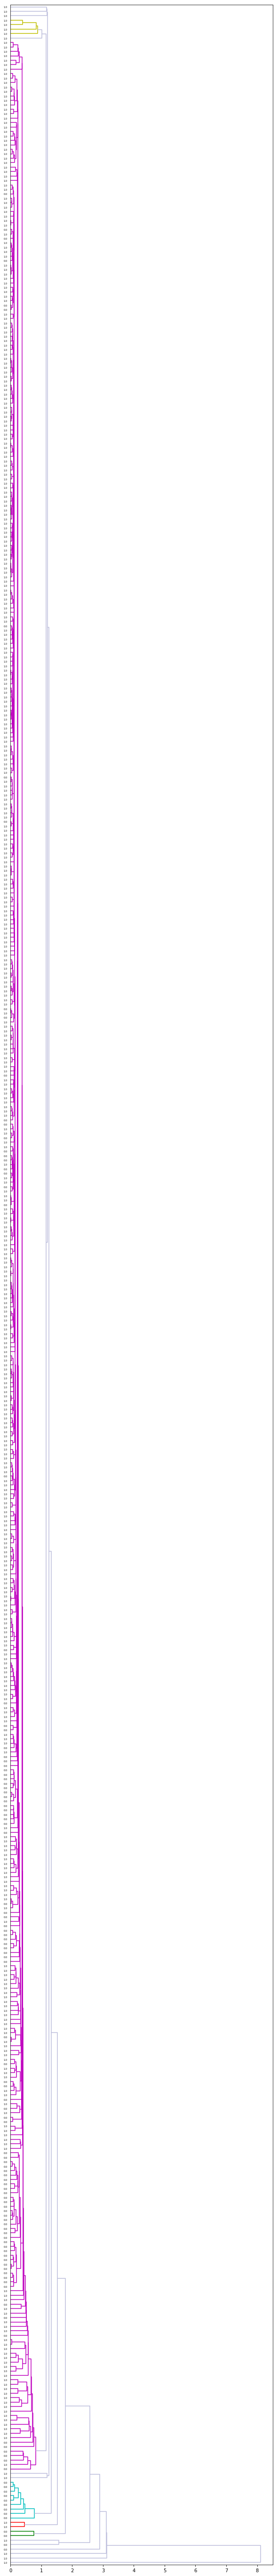

In [90]:
plt.figure(figsize=(10, 100))
dn2 = hierarchy.dendrogram(Z, color_threshold=1, labels = datum.EAS.values, above_threshold_color='#bcbddc', orientation='right')
#plt.xscale('log')

### Построим 9D дендрограмму

Построим для событий дендрограмму. 

Выделим 9 главных компоненты в масштабированных данных (используйте опять  параметр `svd_solver='randomized'` и `random_state=1`), затем из всех 9-мерных точек найдите наиболее удаленную от остальных (по среднему евклидову расстоянию до других точек).

In [50]:
pca = PCA(n_components=9, svd_solver='randomized', random_state=1)

centers9 = pca.fit_transform(events_scaled)

In [ ]:
pca = PCA(n_components=9, svd_solver='randomized', random_state=1)

centers9 = pca.fit_transform(events_scaled)
distance_mat = pdist(centers9) 

plt.figure(figsize=(40, 10))
Z2  = hierarchy.linkage(distance_mat, 'single') 
dn2 = hierarchy.dendrogram(Z2, color_threshold=3)
#plt.yscale('log')

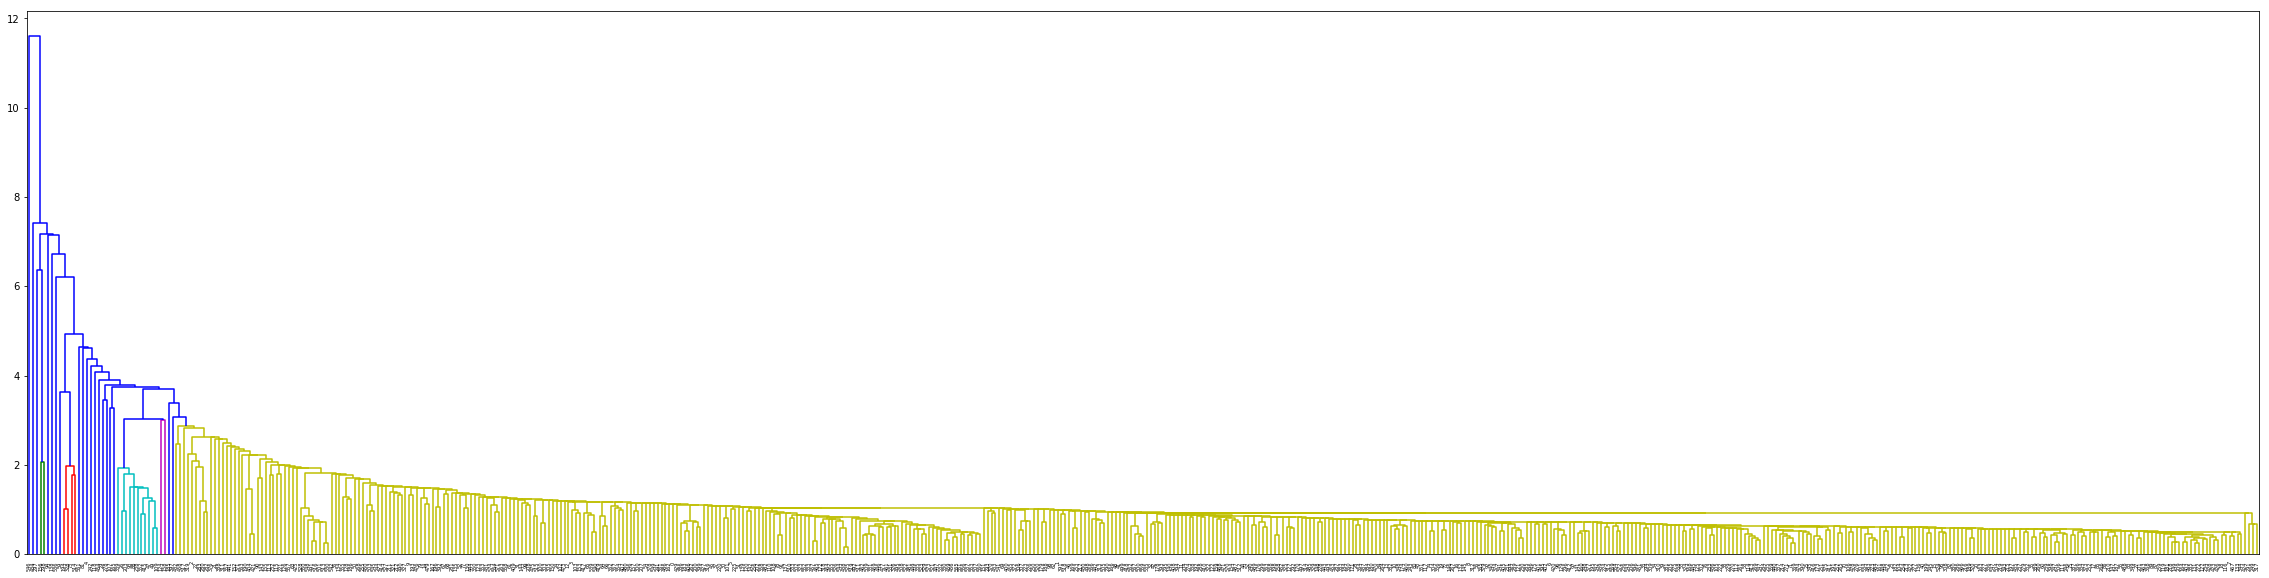

In [52]:
distance_mat = pdist(centers9) 

plt.figure(figsize=(40, 10))
Z2  = hierarchy.linkage(distance_mat, 'single') 
dn2 = hierarchy.dendrogram(Z2, color_threshold=3)
#plt.yscale('log')

In [54]:
print(len(events_scaled))
print(len(centers9))
print(len(events_scaled))
print(len(Z2))
len(distance_mat)

575
575
575
574


165025

In [73]:
help(hierarchy.dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
    Plots the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children.  The top of the U-link indicates a
    cluster merge.  The two legs of the U-link indicate which clusters
    were merged.  The length of the two legs of the U-link represents
    the distance between the child clusters.  It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
      

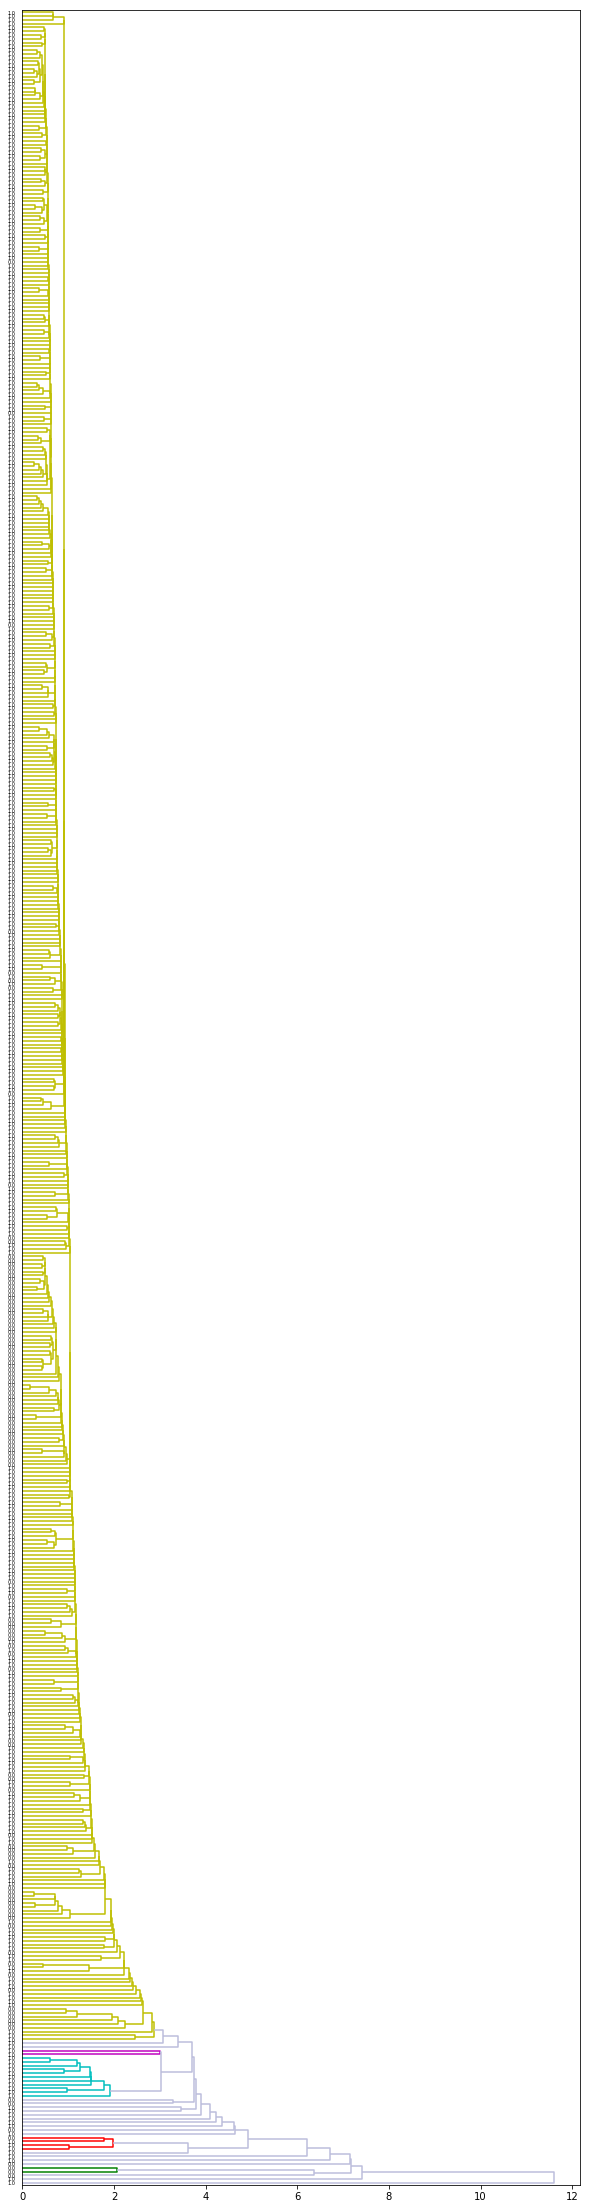

In [71]:
plt.figure(figsize=(10, 40))
dn2 = hierarchy.dendrogram(Z2, labels = datum.EAS.values, color_threshold=3, above_threshold_color='#bcbddc', orientation='right')